In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

import warnings
warnings.simplefilter(action='ignore')
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)
%matplotlib inline

In [146]:
df = pd.read_csv('5. London Housing Data.csv')
df

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN
...,...,...,...,...,...,...
13544,9/1/2019,england,249942,E92000001,64605.0,NaN
13545,10/1/2019,england,249376,E92000001,68677.0,NaN
13546,11/1/2019,england,248515,E92000001,67814.0,NaN
13547,12/1/2019,england,250410,E92000001,NaN,NaN


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 635.2+ KB


# Data Cleaning

In [148]:
df['date']

0         1/1/1995
1         2/1/1995
2         3/1/1995
3         4/1/1995
4         5/1/1995
           ...    
13544     9/1/2019
13545    10/1/2019
13546    11/1/2019
13547    12/1/2019
13548     1/1/2020
Name: date, Length: 13549, dtype: object

In [149]:
df['date'] = pd.to_datetime(df['date'])

In [150]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [151]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,year,month
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1995,2
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1995,3
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1995,4
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1995,5


In [152]:
df.drop(columns=['date', 'code'], axis=1, inplace=True)

In [153]:
df

,area,average_price,houses_sold,no_of_crimes,year,month
0,city of london,91449,17.0,NaN,1995,1
1,city of london,82203,7.0,NaN,1995,2
2,city of london,79121,14.0,NaN,1995,3
3,city of london,77101,7.0,NaN,1995,4
4,city of london,84409,10.0,NaN,1995,5
...,...,...,...,...,...,...
13544,england,249942,64605.0,NaN,2019,9
13545,england,249376,68677.0,NaN,2019,10
13546,england,248515,67814.0,NaN,2019,11
13547,england,250410,NaN,NaN,2019,12


In [154]:
df.isnull().sum()

area                0
average_price       0
houses_sold        94
no_of_crimes     6110
year                0
month               0
dtype: int64

In [155]:
df.dropna(inplace=True)

In [156]:
df.isnull().sum()

area             0
average_price    0
houses_sold      0
no_of_crimes     0
year             0
month            0
dtype: int64

In [157]:
df.duplicated().sum()

0

In [158]:
df.shape

(7375, 6)

In [159]:
df.head()

,area,average_price,houses_sold,no_of_crimes,year,month
72,city of london,284262,24.0,0.0,2001,1
73,city of london,198137,37.0,0.0,2001,2
74,city of london,189033,44.0,0.0,2001,3
75,city of london,205494,38.0,0.0,2001,4
76,city of london,223459,30.0,0.0,2001,5


In [160]:
df.shape

(7375, 6)

In [161]:
df.describe()

,average_price,houses_sold,no_of_crimes,year,month
count,7.375000e+03,7375.000000,7375.000000,7375.000000,7375.000000
mean,3.485487e+05,307.768000,2156.729627,2009.887729,6.474305
std,1.882722e+05,140.912424,900.864824,5.457321,3.441181
min,8.234300e+04,2.000000,0.000000,2001.000000,1.000000
25%,2.251630e+05,207.000000,1622.000000,2005.000000,3.000000
50%,2.960680e+05,283.000000,2130.000000,2010.000000,6.000000
75%,4.159700e+05,390.000000,2580.000000,2015.000000,9.000000
max,1.463378e+06,963.000000,7227.000000,2019.000000,12.000000


In [162]:
df['area'].value_counts()

havering                  227
croydon                   227
bexley                    227
kingston upon thames      227
greenwich                 227
bromley                   227
westminster               227
merton                    227
lambeth                   227
waltham forest            227
islington                 227
wandsworth                227
southwark                 227
hounslow                  227
enfield                   227
hackney                   227
harrow                    227
hammersmith and fulham    227
hillingdon                227
redbridge                 227
ealing                    227
kensington and chelsea    227
richmond upon thames      227
haringey                  227
sutton                    227
barking and dagenham      227
lewisham                  227
brent                     227
camden                    227
barnet                    227
tower hamlets             227
newham                    227
city of london            111
Name: area

# Visualize num_col

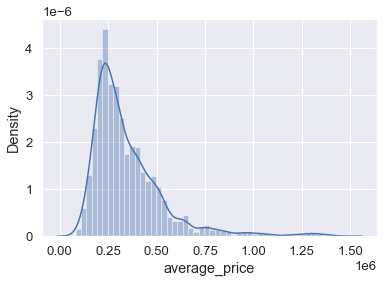

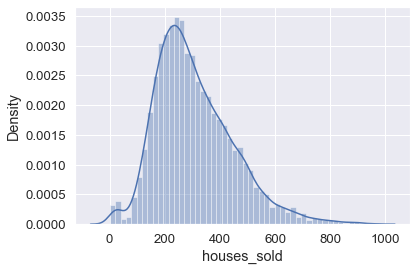

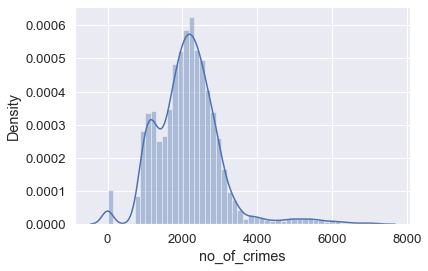

In [163]:
for col in df[['average_price', 'houses_sold', 'no_of_crimes']]:
    sns.distplot(df[col])
    plt.show()

# Detect Outliers 

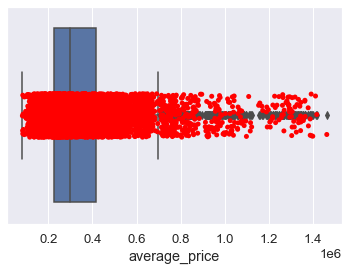

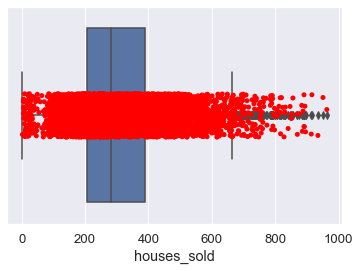

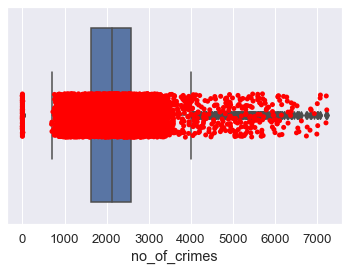

In [164]:
for col in df[['average_price', 'houses_sold', 'no_of_crimes']]:
    sns.boxplot(df[col])
    sns.stripplot(df[col], color='red')
    plt.show()

# Remove Outliers

In [165]:
df.shape

(7375, 6)

In [166]:
from datasist.structdata import detect_outliers

In [167]:
for outliers in num_col:
    outliers = detect_outliers(df, 0, df[['average_price', 'houses_sold', 'no_of_crimes']])
len(outliers)

799

In [171]:
for outliers in num_col:
    outliers = detect_outliers(df, 0, df[['average_price', 'houses_sold', 'no_of_crimes']])
    df.drop(outliers, inplace=True)

In [172]:
len(outliers)

0

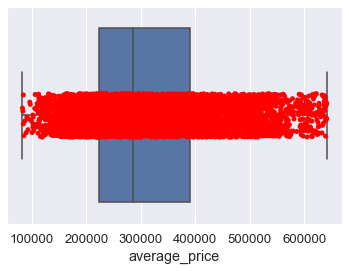

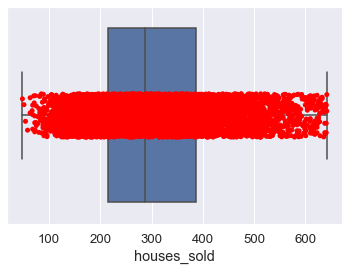

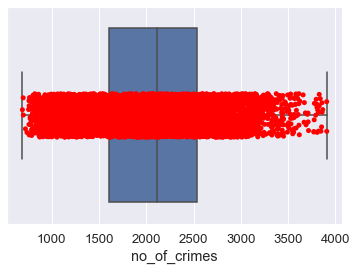

In [173]:
for col in df[['average_price', 'houses_sold', 'no_of_crimes']]:
    sns.boxplot(df[col])
    sns.stripplot(df[col], color='red')
    plt.show()

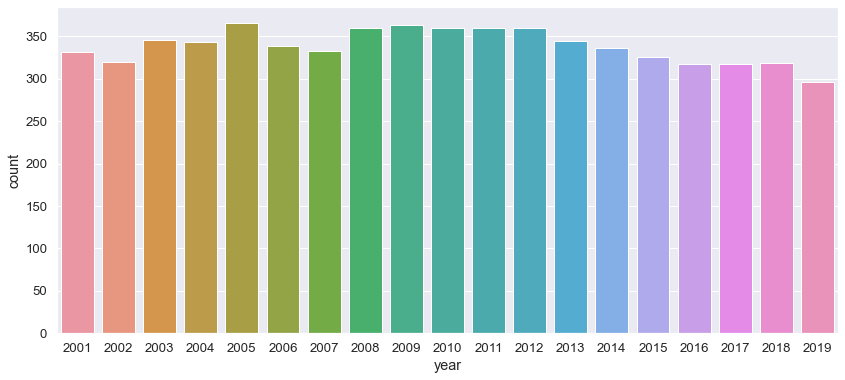

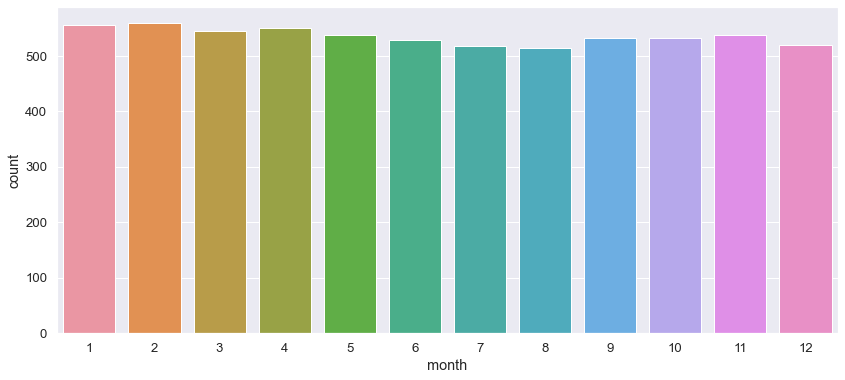

In [174]:
for col in df[['year', 'month']]:
    plt.figure(figsize=(14,6))
    sns.countplot(df[col])
    plt.show()

# Distribution num_col with price

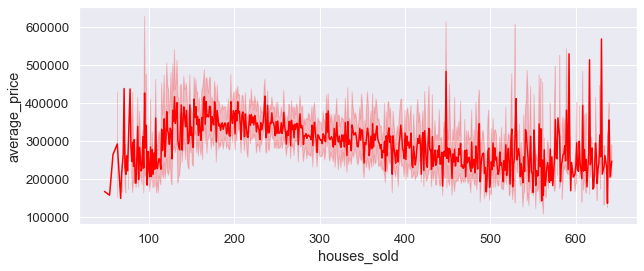

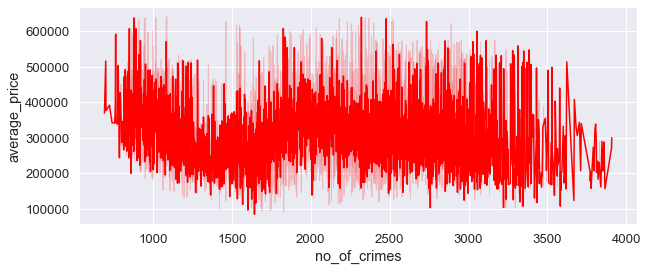

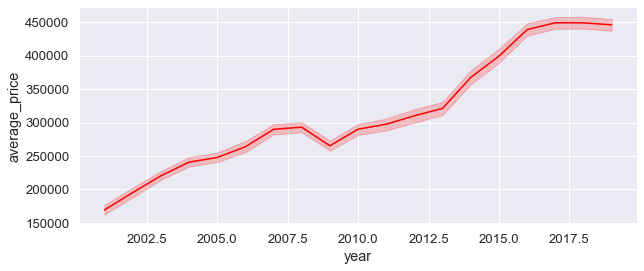

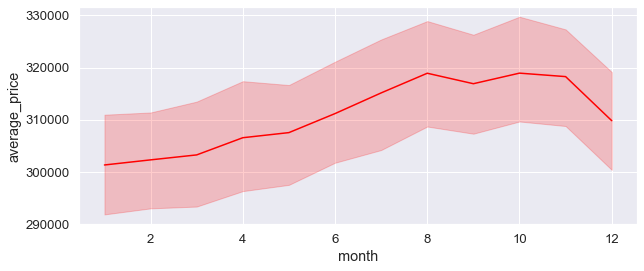

In [175]:
for col in df[['houses_sold', 'no_of_crimes', 'year', 'month']]:
    plt.figure(figsize=(10,4))
    sns.lineplot(x=df[col], y=df['average_price'], color='red')
    plt.show()

<AxesSubplot:>

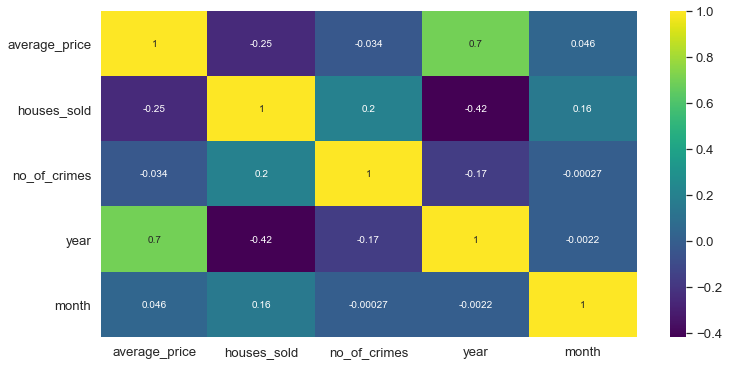

In [176]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True, cmap='viridis')

# no_of_crimes and month are week corr to price

In [177]:
df = pd.get_dummies(df)

In [178]:
df

,average_price,houses_sold,no_of_crimes,year,month,area_barking and dagenham,area_barnet,area_bexley,area_brent,area_bromley,...,area_lewisham,area_merton,area_newham,area_redbridge,area_richmond upon thames,area_southwark,area_sutton,area_tower hamlets,area_waltham forest,area_wandsworth
373,82343,215.0,1771.0,2001,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
374,83266,238.0,1600.0,2001,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
375,84058,274.0,1759.0,2001,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
376,83965,241.0,1643.0,2001,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
377,85124,283.0,1809.0,2001,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9630,586165,435.0,2309.0,2019,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9631,593268,427.0,2125.0,2019,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9632,605360,361.0,2217.0,2019,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9633,599182,330.0,2459.0,2019,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [179]:
df.shape

(6434, 36)

# Make Linear Regression Model 

In [180]:
x = df.drop('average_price', axis=1)
x

,houses_sold,no_of_crimes,year,month,area_barking and dagenham,area_barnet,area_bexley,area_brent,area_bromley,area_camden,...,area_lewisham,area_merton,area_newham,area_redbridge,area_richmond upon thames,area_southwark,area_sutton,area_tower hamlets,area_waltham forest,area_wandsworth
373,215.0,1771.0,2001,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
374,238.0,1600.0,2001,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
375,274.0,1759.0,2001,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
376,241.0,1643.0,2001,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
377,283.0,1809.0,2001,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9630,435.0,2309.0,2019,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9631,427.0,2125.0,2019,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9632,361.0,2217.0,2019,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9633,330.0,2459.0,2019,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [181]:
y = df['average_price']
y

373      82343
374      83266
375      84058
376      83965
377      85124
         ...  
9630    586165
9631    593268
9632    605360
9633    599182
9634    600835
Name: average_price, Length: 6434, dtype: int64

In [182]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(len(x_train))
print(len(x_test))

5147
1287


In [183]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [184]:
models = {
    "LR": LinearRegression(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(),
    "XGBR": XGBRegressor(),
    "KNNR" : KNeighborsRegressor(), 
    "SVR": SVR()
}

In [185]:
for name, model in models.items():
    print('-'*30)
    print(f'Using model: {name}')
    
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    
    y_pred = model.predict(x_test)
    print(f'Test Score: {r2_score(y_test, y_pred)}')  

------------------------------
Using model: LR
Training Score: 0.9070409864184402
Test Score: 0.9043160695006138
------------------------------
Using model: DT
Training Score: 1.0
Test Score: 0.9866543934658316
------------------------------
Using model: RF
Training Score: 0.9988340094729162
Test Score: 0.9925899517006388
------------------------------
Using model: XGBR
Training Score: 0.9984627923143687
Test Score: 0.9942602649256256
------------------------------
Using model: KNNR
Training Score: 0.9737231810217324
Test Score: 0.9582701984374244
------------------------------
Using model: SVR
Training Score: -0.05031585162551355
Test Score: -0.047018114217913354
